In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train_xy.csv')
train.shape

(15000, 160)

In [3]:
test = pd.read_csv('../data/train_x.csv')
test.shape

(10000, 159)

In [13]:
iv_feature = ['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150', 'x_153', 'x_154', 'x_155', 'x_157']
x_train = train[iv_feature]
x_train.shape

(15000, 103)

In [14]:
iv_feature = ['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150', 'x_153', 'x_154', 'x_155', 'x_157']
x_test = test[iv_feature]
x_test.shape

(10000, 103)

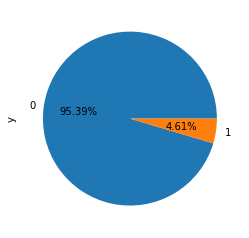

In [15]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [16]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 103)

In [17]:
Y_train = train['y']

In [19]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    if col in x.columns.values:
        dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
        x = pd.concat([x, dummies_df], axis=1)

In [20]:
x.head()

,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,...,x_1551,x_1552,x_1553,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711
0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,1,0,0,1,0,0,0,0,0,0
1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-99,-99,-99,-99,-99,-99,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0


In [21]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 170)
(10000, 170)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn import metrics  #accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import label_propagation
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Reshape, Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from sklearn.cross_validation import train_test_split
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train,X_val,y_train,y_val= train_test_split(train_X,Y_train,test_size=0.2,random_state=2)

In [24]:
def split_data(data_):
    idx_1 = data_[data_['label']==0].index
    idx_2 = data_[data_['label']==1].index
    nb_1 = len(data_.loc[idx_1])
    nb_2 = len(data_.loc[idx_2])
#     print(nb_1)
#     print(nb_2)
    idx_list_1 = list(idx_1)
    idx_list_2 = list(idx_2)
    train_x1 = data_.loc[idx_list_1]
    train_x2 = data_.loc[idx_list_2]
#     print(train_x1.shape)
#     print(train_x2.shape)
    return train_x1,train_x2

In [25]:
def resample_data(data, number):
    idx_1 = data.index
    nb_1 = len(idx_1)
#     print(nb_1)
#     number = int(nb_1 * rate)
    idx_1_sub = np.random.choice(idx_1, number)
#     print(idx_1_sub)
    nb_2 = len(data.loc[idx_1_sub])
#     print(nb_2)
    idx_list_1 = list(idx_1_sub)
    train_1 = data.loc[idx_1_sub]
#     print(train_1.shape)
    return train_1

In [26]:
def concat_data(train_x1, train_x2):
    train_data1 = train_x1.drop(['label'],axis =1)
    train_y1 = train_x1['label']
    
    train_data2 = train_x2.drop(['label'],axis =1)
    train_y2 = train_x2['label']
    
    train_data = train_data1.append(train_data2)
    train_y = train_y1.append(train_y2)
    
    return train_data, train_y

In [27]:
xx = X_train
xx['label'] = y_train

xx.head()

,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,...,x_1552,x_1553,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711,label
1154,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9804,0,0,0,0,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7919,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,0,0,1,0,0,0,0,0,0,0
4854,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,1,0,1,0,0,0,0,0,0,0
5947,0,0,0,0,2,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
train_x1, train_x2 = split_data(xx)
print(train_x1.shape)
print(train_x2.shape)

(11442, 171)
(558, 171)


In [115]:
train_temp = resample_data(train_x1, 600)
multi_x, multi_y= concat_data(train_temp, train_x2)
gb = XGBClassifier( n_estimators= 100, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.9, 
                        colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(multi_x, multi_y)

predictions1 = gb.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions1, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions1)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.99      0.71      0.83      2867
    class 1       0.11      0.78      0.20       133

avg / total       0.95      0.72      0.80      3000

0.7477964181468669


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [95]:
predictions1[:,1]

array([0.92361474, 0.40386182, 0.3565814 , ..., 0.01947453, 0.86569047,
       0.01969341], dtype=float32)

In [116]:
pred = []
test_pred = [] 
for i in range(20):
    print('第',i+1,'个模型...')
    train_temp = resample_data(train_x1, 600)
#     print(train_temp.shape)
    multi_x, multi_y= concat_data(train_temp, train_x2)
#     print(multi_x.shape)
#     print(multi_y.shape)
    
    gbm = XGBClassifier( n_estimators= 100, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.9, 
                        colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(multi_x, multi_y)
    
    predictions = gbm.predict_proba(X_val)
    
    test_predictions = gbm.predict_proba(test_X)

#     target_names = ['class 0', 'class 1']
#     print(classification_report(y_val, predictions, target_names=target_names))

#     val_acc = metrics.accuracy_score(y_val,predictions)#验证集上的auc值
#     print(val_acc)
    
    pred.append(predictions[:,1])
    test_pred.append(test_predictions[:,1])

第 1 个模型...
第 2 个模型...
第 3 个模型...
第 4 个模型...
第 5 个模型...
第 6 个模型...
第 7 个模型...
第 8 个模型...
第 9 个模型...
第 10 个模型...
第 11 个模型...
第 12 个模型...
第 13 个模型...
第 14 个模型...
第 15 个模型...
第 16 个模型...
第 17 个模型...
第 18 个模型...
第 19 个模型...
第 20 个模型...


In [155]:
pred_sum = pred[0]
for i in range(1,20):
    pred_sum = pred_sum + pred[i]
# print(pred_sum)
pred_sum_av = pred_sum/20.0
for i in range(3000):
    if pred_sum_av[i] >= 0.95:
        pred_sum_av[i] = 1
    else:
        pred_sum_av[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, pred_sum_av, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,pred_sum_av)#验证集上的auc值
print(val_acc)
val_auc = metrics.roc_auc_score(y_val,pred_sum_av)#验证集上的auc值
print(val_auc)
print(np.sum(pred_sum_av))

             precision    recall  f1-score   support

    class 0       0.96      1.00      0.98      2867
    class 1       1.00      0.01      0.01       133

avg / total       0.96      0.96      0.93      3000

0.956
0.5037593984962406
1.0


In [154]:
tt = pred_sum_av + y_val
# tt.iloc[1]
count = 0
for i in range(3000):
    if tt.iloc[i] == 2:
        count = count + 1
print(count)

3


In [125]:
test_pred_sum = test_pred[0]
for i in range(1,20):
    test_pred_sum = test_pred_sum + test_pred[i]
# print(test_pred_sum)
test_pred_sum_av = test_pred_sum/20.0
for i in range(10000):
    if test_pred_sum_av[i] >= 0.78:
        test_pred_sum_av[i] = 1
    else:
        test_pred_sum_av[i] = 0

print(np.sum(test_pred_sum_av))
print(test_pred_sum_av.shape)

2044.0
(10000,)


In [126]:
pred_2 = []
test_pred_2 = []
for i in range(20):
    print('第',i+1,'个模型...')
    train_temp = resample_data(train_x1, 600)
#     print(train_temp.shape)
    multi_x, multi_y= concat_data(train_temp, train_x2)
#     print(multi_x.shape)
#     print(multi_y.shape)
    
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, min_samples_split=8, min_samples_leaf=2, max_depth=4).fit(multi_x,multi_y)
    
    predictions = gbm.predict_proba(X_val)
    
    test_predictions = gbm.predict_proba(test_X)

#     target_names = ['class 0', 'class 1']
#     print(classification_report(y_val_2, predictions, target_names=target_names))

#     val_acc = metrics.accuracy_score(y_val_2,predictions)#验证集上的auc值
#     print(val_acc)
    
    pred_2.append(predictions[:,1])
    test_pred_2.append(test_predictions[:,1])

第 1 个模型...
第 2 个模型...
第 3 个模型...
第 4 个模型...
第 5 个模型...
第 6 个模型...
第 7 个模型...
第 8 个模型...
第 9 个模型...
第 10 个模型...
第 11 个模型...
第 12 个模型...
第 13 个模型...
第 14 个模型...
第 15 个模型...
第 16 个模型...
第 17 个模型...
第 18 个模型...
第 19 个模型...
第 20 个模型...


In [127]:
gbdt_pred_sum = pred_2[0]
for i in range(1,20):
    gbdt_pred_sum = gbdt_pred_sum + pred_2[i]
# print(pred_sum)
gbdt_pred_sum_av = gbdt_pred_sum/20.0
for i in range(3000):
    if gbdt_pred_sum_av[i] >= 0.75:
        gbdt_pred_sum_av[i] = 1
    else:
        gbdt_pred_sum_av[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, gbdt_pred_sum_av, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,gbdt_pred_sum_av)#验证集上的auc值
print(val_acc)
val_auc = metrics.roc_auc_score(y_val,gbdt_pred_sum_av)#验证集上的auc值
print(val_auc)
print(np.sum(gbdt_pred_sum_av))

             precision    recall  f1-score   support

    class 0       0.97      0.94      0.95      2867
    class 1       0.18      0.29      0.22       133

avg / total       0.93      0.91      0.92      3000

0.9086666666666666
0.6116398425432258
217.0


In [128]:
gbdt_test_pred_sum = test_pred_2[0]
for i in range(1,20):
    gbdt_test_pred_sum = gbdt_test_pred_sum + test_pred_2[i]
# print(test_pred_sum)
gbdt_test_pred_sum_av = gbdt_test_pred_sum/20.0
for i in range(10000):
    if gbdt_test_pred_sum_av[i] >= 0.75:
        gbdt_test_pred_sum_av[i] = 1
    else:
        gbdt_test_pred_sum_av[i] = 0

print(np.sum(gbdt_test_pred_sum_av))
print(gbdt_test_pred_sum_av.shape)

2056.0
(10000,)


In [130]:
pred_sum_sum = pred_sum_av + gbdt_pred_sum_av
print(pred_sum_sum)
for i in range(3000):
    if pred_sum_sum[i] >= 1:
        pred_sum_sum[i] = 1
    else:
        pred_sum_sum[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, pred_sum_sum, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,pred_sum_sum)#验证集上的acc值
print(val_acc)
# val_acc1 = metrics.accuracy_score(y_val,predictions)#验证集上的acc值
# print(val_acc1)
val_auc = metrics.roc_auc_score(y_val,pred_sum_sum)#验证集上的auc值
print(val_auc)
# val_auc1 = metrics.roc_auc_score(y_val,predictions)#验证集上的auc值
# print(val_auc1)
print(np.sum(pred_sum_sum))

[0. 0. 0. ... 0. 1. 0.]
             precision    recall  f1-score   support

    class 0       0.97      0.93      0.95      2867
    class 1       0.17      0.31      0.22       133

avg / total       0.93      0.90      0.91      3000

0.901
0.6183836815617698
246.0


In [131]:
test_pred_sum_sum = test_pred_sum_av + gbdt_test_pred_sum_av
print(test_pred_sum_sum)
for i in range(10000):
    if test_pred_sum_sum[i] >= 1:
        test_pred_sum_sum[i] = 1
    else:
        test_pred_sum_sum[i] = 0


print(np.sum(test_pred_sum_sum))

[0. 0. 2. ... 0. 0. 2.]
2299.0


In [132]:
pred_sum_pd = pd.DataFrame(test_pred_sum_sum)
y = Y_train.append(pred_sum_pd)
y.shape

(25000, 1)

In [133]:
xx = pd.concat([x_train,x_test])
xx.shape

(25000, 103)

In [134]:
xx['y'] = y

In [135]:
xx.to_csv('../data/train_xy_all3.csv',index=False)

In [84]:
ddd = pd.read_csv('../data/train_xy_all.csv')

In [136]:
np.sum(ddd.y)

3426

In [282]:
def pretreatment(train, test):
    x_test = test.drop(['cust_group','cust_id'],axis=1)
    x_train = train.drop(['cust_group','y','cust_id'],axis =1)
    
    x = pd.concat([x_train,x_test])
    print(x.shape)
    
    for i in range(96,158):
        col = 'x'+'_'+str(i)
        dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
        x = pd.concat([x, dummies_df], axis=1)
    
    train_X = x[0:15000]
    test_X = x[15000:25000]
    print(train_X.shape)
    print(test_X.shape)
    
    X_train,X_val,y_train,y_val= train_test_split(train_X,Y_train,test_size=0.2,random_state=2)
    
    xx = X_train
    xx['label'] = y_train

    xxx = xx.corr()
    columns = xxx[xxx['label']>0].index.values
#     print(columns)
    
    xxxx = xx[columns]
    number = xxxx.shape[1]
    
    column = columns[1:number]
    
    X_val = X_val[column]
    print(X_val.shape)

    test_X = test_X[column]
    print(test_X.shape)

    return xxxx,X_val,test_X,y_val

In [283]:
xxxx_2,X_val_2,test_X_2,y_val_2 = pretreatment(train, test_x2)
train_x1_2, train_x2_2 = split_data(xxxx_2)
print(train_x1_2.shape)
print(train_x2_2.shape)

(23449, 158)
(15000, 359)
(8449, 359)
(3000, 130)
(8449, 130)
(11442, 131)
(558, 131)


In [284]:
X_val_2.head()

,x_10,x_100,x_101,x_104,x_105,x_11,x_12,x_121,x_122,x_124,...,x_153-99,x_1532,x_1533,x_1542,x_1543,x_1552,x_1553,x_156-99,x_1562,x_157-99
7592,-99,1,1,-99,-99,-99,-99,-99,-99,-99,...,0,0,1,0,1,0,1,0,1,1
3551,-99,1,1,-99,-99,-99,-99,-99,-99,-99,...,0,0,0,0,0,0,0,0,0,0
9698,0,1,1,-99,-99,0,0,-99,-99,-99,...,0,0,0,1,0,1,0,0,1,0
3759,-99,1,1,-99,-99,-99,-99,-99,-99,-99,...,0,0,0,0,0,0,0,0,1,0
2353,1,1,1,-99,-99,1,0,-99,-99,-99,...,0,0,0,0,0,0,0,0,1,0


In [297]:
pred_2 = []
test_pred_2 = [] 
for i in range(200):
    print('第',i+1,'个模型...')
    train_temp = resample_data(train_x1_2, 600)
#     print(train_temp.shape)
    multi_x, multi_y= concat_data(train_temp, train_x2_2)
#     print(multi_x.shape)
#     print(multi_y.shape)
    
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05,max_depth=4, random_state=0).fit(multi_x, multi_y)
    
    predictions = gbm.predict(X_val_2)
    
    test_predictions = gbm.predict(test_X_2)

    target_names = ['class 0', 'class 1']
#     print(classification_report(y_val_2, predictions, target_names=target_names))

    val_acc = metrics.accuracy_score(y_val_2,predictions)#验证集上的auc值
    print(val_acc)
    
    pred_2.append(predictions)
    test_pred_2.append(test_predictions)

第 1 个模型...
0.698
第 2 个模型...
0.7006666666666667
第 3 个模型...
0.693
第 4 个模型...
0.708
第 5 个模型...
0.686
第 6 个模型...
0.713
第 7 个模型...
0.7106666666666667
第 8 个模型...
0.7163333333333334
第 9 个模型...
0.7056666666666667
第 10 个模型...
0.694
第 11 个模型...
0.6896666666666667
第 12 个模型...
0.692
第 13 个模型...
0.719
第 14 个模型...
0.721
第 15 个模型...
0.679
第 16 个模型...
0.7063333333333334
第 17 个模型...
0.7126666666666667
第 18 个模型...
0.7223333333333334
第 19 个模型...
0.7006666666666667
第 20 个模型...
0.7116666666666667
第 21 个模型...
0.7143333333333334
第 22 个模型...
0.712
第 23 个模型...
0.671
第 24 个模型...
0.699
第 25 个模型...
0.6876666666666666
第 26 个模型...
0.7073333333333334
第 27 个模型...
0.6893333333333334
第 28 个模型...
0.6853333333333333
第 29 个模型...
0.6856666666666666
第 30 个模型...
0.72
第 31 个模型...
0.7003333333333334
第 32 个模型...
0.7113333333333334
第 33 个模型...
0.7096666666666667
第 34 个模型...
0.7163333333333334
第 35 个模型...
0.682
第 36 个模型...
0.7283333333333334
第 37 个模型...
0.7036666666666667
第 38 个模型...
0.7013333333333334
第 39 个模型...
0.6963333333333

In [313]:
pred_sum2 = pred_2[0]
for i in range(1,200):
    pred_sum2 = pred_sum2 + pred_2[i]
print(pred_sum2)
for i in range(3000):
    if pred_sum2[i] >= 200:
        pred_sum2[i] = 1
    else:
        pred_sum2[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val_2, pred_sum2, target_names=target_names))

val_acc = metrics.accuracy_score(y_val_2, pred_sum2)#验证集上的auc值
print(val_acc)
print(np.sum(pred_sum2))

[197   0   4 ...   0 189   0]
             precision    recall  f1-score   support

    class 0       0.96      0.93      0.95      2867
    class 1       0.15      0.25      0.18       133

avg / total       0.93      0.90      0.91      3000

0.902
227


In [314]:
test_pred_sum2 = test_pred_2[0]
for i in range(1,200):
    test_pred_sum2 = test_pred_sum2 + test_pred_2[i]
print(test_pred_sum2)
for i in range(8449):
    if test_pred_sum2[i] >= 200:
        test_pred_sum2[i] = 1
    else:
        test_pred_sum2[i] = 0

print(np.sum(test_pred_sum2))
print(test_pred_sum2.shape)

[160  96 200 ...  45 188 197]
1283
(8449,)


In [300]:
test_x2['label'] = test_pred_sum2

test_x3,test_x4 = split_data(test_x2)
print(test_x3.shape)
print(test_x4.shape)

(473, 160)
(7976, 160)


In [294]:
test_x3.to_csv('../data/train_x_y2.csv',index=False)

In [252]:
# pred_sum3 = pred3[0]
# for i in range(1,200):
#     pred_sum3 = pred_sum3 + pred3[i]
# print(pred_sum)
# for i in range(3000):
#     if pred_sum3[i] >= 1:
#         pred_sum3[i] = 1
#     else:
#         pred_sum3[i] = 0

# target_names = ['class 0', 'class 1']
# print(classification_report(y_val, pred_sum3, target_names=target_names))

# val_acc = metrics.accuracy_score(y_val,pred_sum3)#验证集上的auc值
# print(val_acc)
# print(np.sum(pred_sum3))

In [253]:
# pred4 = []
# for i in range(1):
#     print('第',i+1,'个模型...')
#     train_temp = resample_data(train_x1, 600)
# #     print(train_temp.shape)
#     multi_x, multi_y= concat_data(train_temp, train_x2)
# #     print(multi_x.shape)
# #     print(multi_y.shape)
    
#     clf = SVC(kernel='linear', C=1).fit(multi_x, multi_y)
    
#     predictions = clf.predict(X_val)

#     target_names = ['class 0', 'class 1']
#     print(classification_report(y_val, predictions, target_names=target_names))

#     val_acc = metrics.accuracy_score(y_val,predictions)#验证集上的auc值
#     print(val_acc)
    
#     pred4.append(predictions)

In [254]:
# pred_sum4 = pred4[0]
# for i in range(1,200):
#     pred_sum4 = pred_sum4 + pred4[i]
# print(pred_sum4)
# for i in range(3000):
#     if pred_sum4[i] >= 180:
#         pred_sum4[i] = 1
#     else:
#         pred_sum4[i] = 0

# target_names = ['class 0', 'class 1']
# print(classification_report(y_val, pred_sum4, target_names=target_names))

# val_acc = metrics.accuracy_score(y_val,pred_sum4)#验证集上的auc值
# print(val_acc)
# print(np.sum(pred_sum4))

In [241]:
pred_sum_sum = pred_sum + pred_sum1 + pred_sum2
print(pred_sum_sum)
for i in range(3000):
    if pred_sum_sum[i] >= 1:
        pred_sum_sum[i] = 1
    else:
        pred_sum_sum[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, pred_sum_sum, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,pred_sum_sum)#验证集上的auc值
print(val_acc)
print(np.sum(pred_sum_sum))

[3 0 1 ... 0 3 0]
             precision    recall  f1-score   support

    class 0       1.00      0.35      0.52      2867
    class 1       0.07      0.98      0.12       133

avg / total       0.96      0.38      0.50      3000

0.379
1990


In [185]:
np.sum(y_val)

133